# Testing energy terms

In [1]:
import random
import micromagneticmodel as mm
import discretisedfield as df
import oommfc as mc
import numpy as np

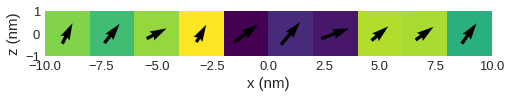

In [2]:
random.seed(1)

def m_random(point):
    uniform_value = np.array([1, 1, 1])
    random_value = np.array([random.random()-0.5 for i in range(3)])
    return uniform_value + random_value

name = 'testing'

p1 = (-10e-9, -1e-9, -1e-9)
p2 = (10e-9, 1e-9, 1e-9)
n = (10, 1, 1)
region = df.Region(p1=p1, p2=p2)
subregions = {'r1': df.Region(p1=(-10e-9, -1e-9, -1e-9), p2=(0, 1e-9, 1e-9)),
              'r2': df.Region(p1=(0, -1e-9, -1e-9), p2=(10e-9, 1e-9, 1e-9))}
mesh = df.Mesh(region=region, n=n, subregions=subregions)

Ms = 1e6
m = df.Field(mesh, dim=3, value=m_random, norm=Ms)
m.plane('y').mpl(scalar_colorbar=False)

system = mm.System(name=name)
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.5)

md = mc.MinDriver()
td = mc.TimeDriver()

def min_drive(system):
    system.m = df.Field(mesh, dim=3, value=m_random, norm=Ms)
    md.drive(system, save=True, overwrite=True)
    
def time_drive(system):
    system.m = df.Field(mesh, dim=3, value=m_random, norm=Ms)
    td.drive(system, t=2e-9, n=50, save=True, overwrite=True)
    
def min_time_drive(system):
    min_drive(system)
    system.m.orientation.plane('y').mpl(scalar_colorbar=False, scalar_clim=(-1, 1))

    time_drive(system)
    system.m.orientation.plane('y').mpl(scalar_colorbar=False, scalar_clim=(-1, 1))

## Zeeman

Running OOMMF ... (0.9 s)
Running OOMMF ... (1.3 s)


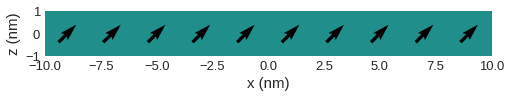

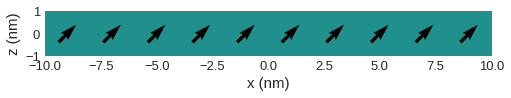

In [3]:
H = (1e5, 0, 1e5)
system.energy = mm.Zeeman(H=H)
min_time_drive(system)

Running OOMMF ... (1.0 s)
Running OOMMF ... (1.3 s)


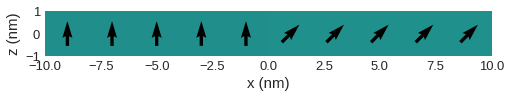

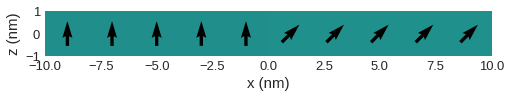

In [4]:
H = {'r1': (0, 0, 1e5), 'r2': (1e5, 0, 1e5)}
system.energy = mm.Zeeman(H=H)
min_time_drive(system)

## Exchange

Running OOMMF ... (1.0 s)
Running OOMMF ... (1.3 s)


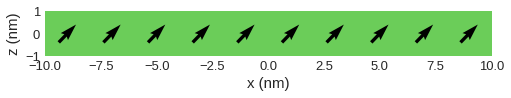

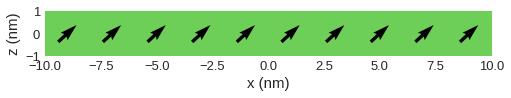

In [5]:
A = 1e-12
system.energy = mm.Exchange(A=A)
min_time_drive(system)

Running OOMMF ... (0.9 s)
Running OOMMF ... (1.3 s)


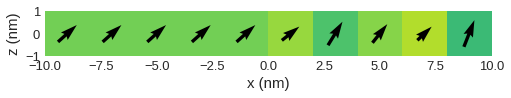

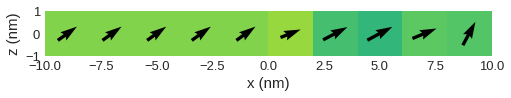

In [6]:
# Problems:
# 1. A=0 seems to be not supported

A = {'r1': 1e-12, 'r2': 0}
system.energy = mm.Exchange(A=A)
min_time_drive(system)